# Analytics of NFT'S Collections

##### Introduction

##### This data has information about the top 250 NFT collections in the word

##### - Columns ( Collections, Sales, Buyers, Txns, Owners)
##### - link to the sites where I got this data: https://www.kaggle.com/hemil26/nft-collections-dataset



## In this step, I will analized the format and  counts about this dataset

In [44]:
# Here I install the necessary libraries to develop the data analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [45]:
# In this step I open a dataset and read your information and calculate your quantity of lines and columns.

df = pd.read_csv('Data/nft_sales.csv', sep=',')
print(df.head())
print('===========================================================================\n')
print(df.info())
print('===========================================================================\n')
print(f'Quantity of lines: {df.shape[0]}\nQuantity of Columns: {df.shape[1]}')


            Collections           Sales     Buyers        Txns     Owners
0         Axie Infinity  $3,328,148,500  1,079,811   9,755,511  2,656,431
1           CryptoPunks  $1,664,246,968      4,723      18,961      3,289
2            Art Blocks  $1,075,223,906     20,934     117,602     25,094
3  Bored Ape Yacht Club    $783,882,186      8,284      22,584      5,862
4          NBA Top Shot    $781,965,423    374,818  11,790,699    603,928

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       244 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None

Quantity of lines: 250
Quantity of Columns: 5


In [46]:
""" Analyzing the data went found in column igual (owners) just 244 datas. 
For this reason I'm will remove this lines in this dataset. """

nft_collections = df.dropna()

In [47]:
# Analyzing this data I noticed that the data type of the columns (Sales, Buyers, Txns, Owners) is text.

nft_collections

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","1,079,811","9,755,511","2,656,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","117,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","374,818","11,790,699","603,928"
...,...,...,...,...,...
245,Evolution,"$2,536,468",746,"4,961","2,061"
246,LegionPunks,"$2,535,490","1,702","3,794","2,410"
247,BabyApes,"$2,521,714","1,671","3,405","2,785"
248,Train of the Century,"$2,504,080","3,139","39,460","3,160"


In [48]:
# In this step I'm will clean these values removing this symbols($ and ',') and changing name of columns.

nft_collections.rename(columns = {'Txns': 'Transactions'}, inplace = True)
nft_collections['Sales'] =  nft_collections['Sales'].str.replace('$', '')
nft_collections['Sales'] =  nft_collections['Sales'].str.replace(',', '')
nft_collections['Buyers'] = nft_collections['Buyers'].str.replace(',','')
nft_collections['Transactions'] =  nft_collections['Transactions'] .str.replace(',','')
nft_collections['Owners'] =  nft_collections['Owners'].str.replace(',','')

warnings.filterwarnings('ignore')
nft_collections


,Collections,Sales,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


In [49]:
# Here I'm will change the type of columns(Sales, Buyers, Transactions, Owners) for float.

nft_collections['Sales'] = nft_collections['Sales'].astype('int64')
nft_collections['Buyers'] = nft_collections['Buyers'].astype('int64')
nft_collections['Transactions'] = nft_collections['Transactions'].astype('int64')
nft_collections['Owners'] = nft_collections['Owners'].astype('int64')
nft_collections

,Collections,Sales,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


In [50]:
# In this step I'm will sum the sales and count (Buyers,  Transactions, Owners) and modify a format the values.

sum_sales = nft_collections['Sales'].sum()
sum_sales = f'U${sum_sales:_.0f}'
sum_sales = sum_sales.replace('_','.')

sum_buyers = nft_collections['Buyers'].sum()
sum_buyers = f'{sum_buyers:_.0f}'
sum_buyers = sum_buyers.replace('_','.')

sum_transactions = nft_collections['Transactions'].sum()
sum_transactions = f'{sum_transactions:_.0f}'
sum_transactions = sum_transactions.replace('_','.')

sum_Owners = nft_collections['Owners'].sum()
sum_Owners = f'{sum_Owners:_.0f}'
sum_Owners = sum_Owners.replace('_','.')

print(f'Sales in Dollar = {sum_sales}')
print(f'Quantity of Buyers Total = {sum_buyers}')
print(f'Quantity of Transactions Total = {sum_transactions}')
print(f'Quantity of Owners Total = {sum_Owners}')

Sales in Dollar = U$14.561.305.765
Quantity of Buyers Total = 3.072.386
Quantity of Transactions Total = 33.651.959
Quantity of Owners Total = 7.038.888


In [51]:
# Here I describe the columns. 

nft_collections.describe().round(2)

,Sales,Buyers,Transactions,Owners
count,2.440000e+02,244.00,244.00,244.00
mean,5.967748e+07,12591.75,137917.86,28847.90
std,2.573985e+08,77380.02,1021682.34,238413.43
min,2.498805e+06,31.00,47.00,1.00
25%,4.627684e+06,2346.75,5928.50,2533.75
50%,1.139971e+07,3977.00,9527.50,3536.00
75%,3.394315e+07,5583.50,14436.25,4883.50
max,3.328148e+09,1079811.00,11790699.00,2656431.00


## In this step I go create a small visualization analytics about this dataset

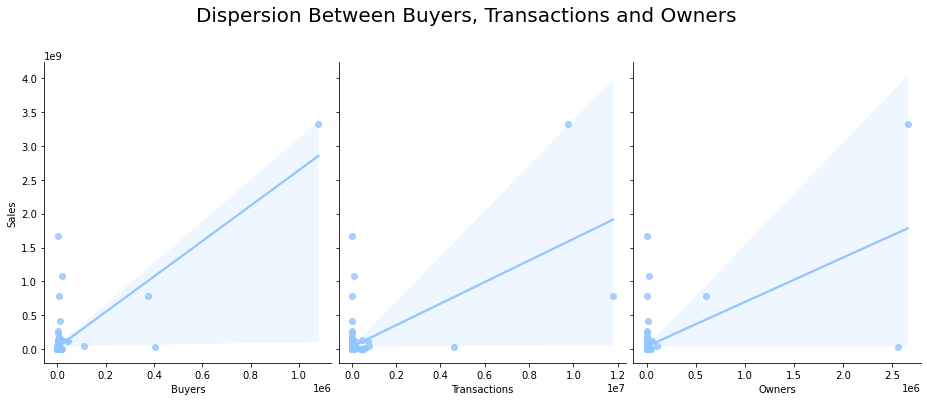

In [52]:
""" Scatterplots are used to score data on a vertical and horizontal axis with the intention of showing how much one
variable is affected by another. """

ax = sns.pairplot(nft_collections, y_vars='Sales', x_vars=['Buyers','Transactions','Owners'], kind='reg',height=5)
ax.figure.set_size_inches(13,5)
ax.fig.suptitle('Dispersion Between Buyers, Transactions and Owners', fontsize=20, y=1.1)
ax

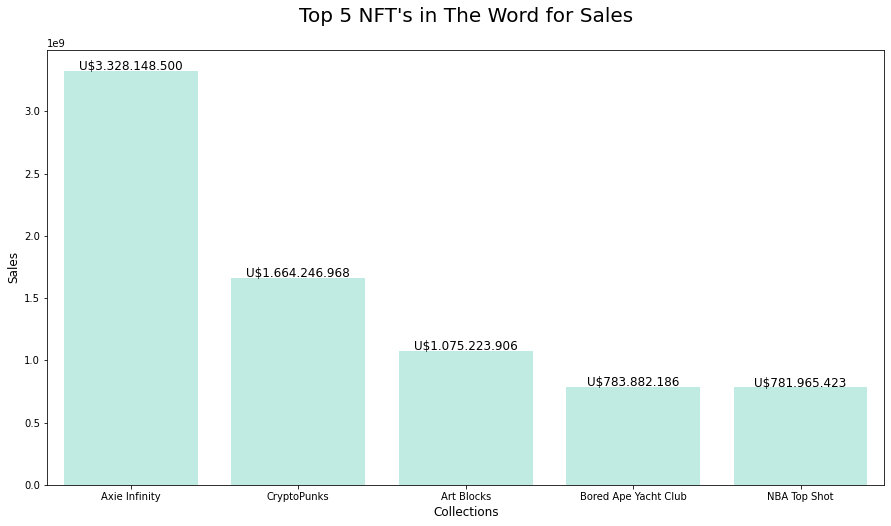

In [53]:
# here, you go see the five NFT'S by sales in the world.

sales = sns.barplot(x="Collections", y="Sales",color='#b8f2e6', data=nft_collections.nlargest(5, 'Sales'))

for i in sales.patches:

    sales.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')

sales.figure.set_size_inches(15,8)
sales.set_title("Top 5 NFT's in The Word for Sales", fontsize=20, y=1.05)
sales.xaxis.label.set_size(12)
sales.yaxis.label.set_size(12)



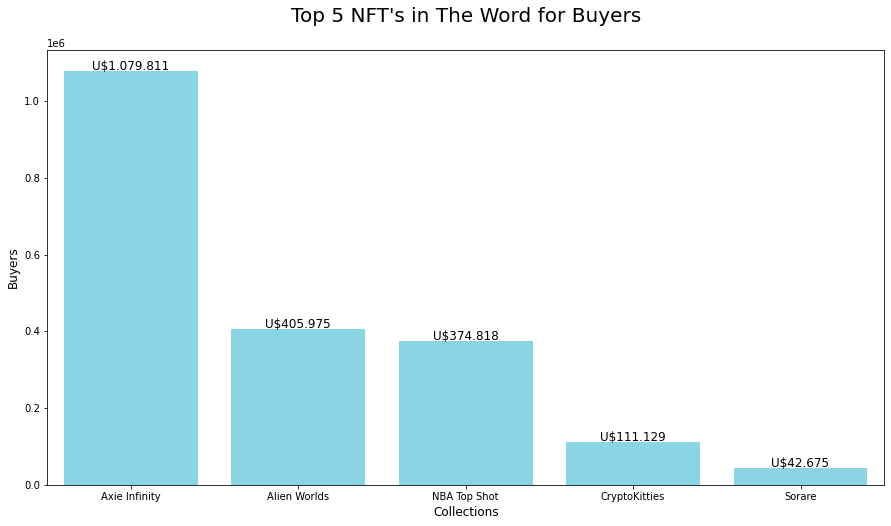

In [54]:
# here, you go see the five NFT'S by sales in the world.

Buyers = sns.barplot(x="Collections", y="Buyers",color='#7bdff2', data=nft_collections.nlargest(5, 'Buyers'))

for i in Buyers.patches:

    Buyers.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')

Buyers.figure.set_size_inches(15,8)
Buyers.set_title("Top 5 NFT's in The Word for Buyers", fontsize=20, y=1.05)
Buyers.xaxis.label.set_size(12)
Buyers.yaxis.label.set_size(12)



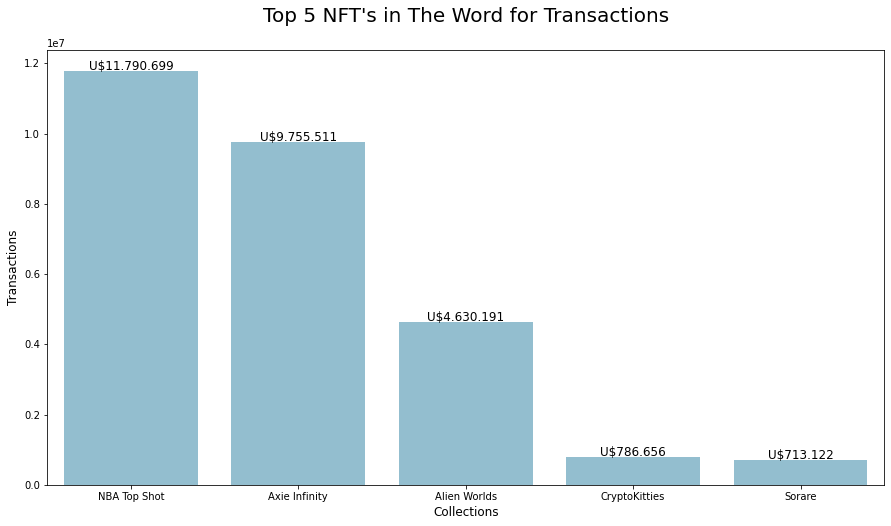

In [55]:
# here, you go see the five NFT'S by Transactions in the world.

Transactions = sns.barplot(x="Collections", y="Transactions",color='#89c2d9', 
                           data=nft_collections.nlargest(5, 'Transactions'))

for i in Transactions.patches:
    Transactions.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
     
Transactions.figure.set_size_inches(15,8)
Transactions.set_title("Top 5 NFT's in The Word for Transactions", fontsize=20, y=1.05 )
Transactions.xaxis.label.set_size(12)
Transactions.yaxis.label.set_size(12)

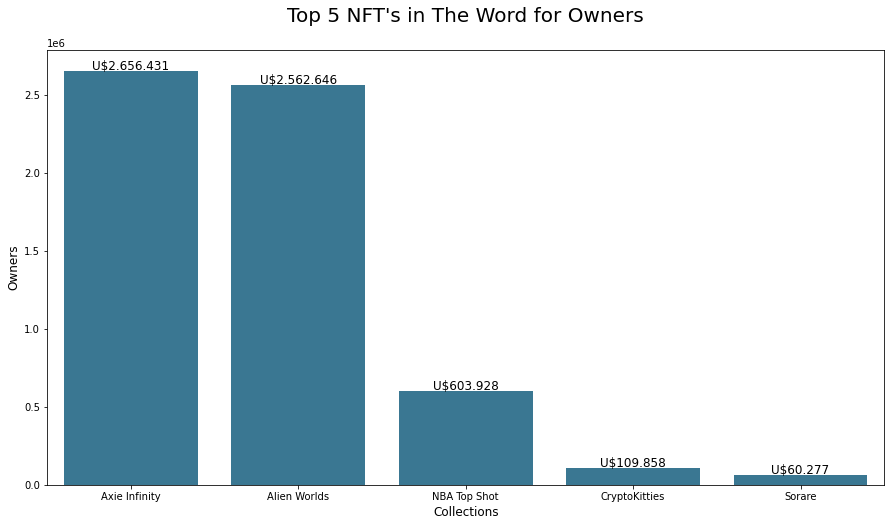

In [56]:
# here, you go see the five NFT'S by Owners in the world.


Owners = sns.barplot(x="Collections", y="Owners", color='#2c7da0',data=nft_collections.nlargest(5, 'Owners'))

for i in Owners.patches:
    Owners.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),

                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
    
Owners.figure.set_size_inches(15,8)
Owners.set_title("Top 5 NFT's in The Word for Owners", fontsize=20, y=1.05)
Owners.xaxis.label.set_size(12)
Owners.yaxis.label.set_size(12)

In [57]:
# In this step, I created a columns that show me Nft's that has sales more than 500.000.000 Dollars.

nft_collections['Sales Greater than 500.000.000'] = np.where(nft_collections['Sales']>=500000000, 'Yes', 'No')
nft_collections.head()


,Collections,Sales,Buyers,Transactions,Owners,Sales Greater than 500.000.000
0,Axie Infinity,3328148500,1079811,9755511,2656431,Yes
1,CryptoPunks,1664246968,4723,18961,3289,Yes
2,Art Blocks,1075223906,20934,117602,25094,Yes
3,Bored Ape Yacht Club,783882186,8284,22584,5862,Yes
4,NBA Top Shot,781965423,374818,11790699,603928,Yes


In [58]:
# Here, I will go calculate the values around  the indicators (sales, Buyers, Transactions e Owner)

sum_sales_than_500000000= nft_collections.groupby('Sales Greater than 500.000.000').sum()
print(format(sum_sales_than_500000000))



                                     Sales   Buyers  Transactions   Owners
Sales Greater than 500.000.000                                            
No                              6927838782  1583816      11946602  3744284
Yes                             7633466983  1488570      21705357  3294604


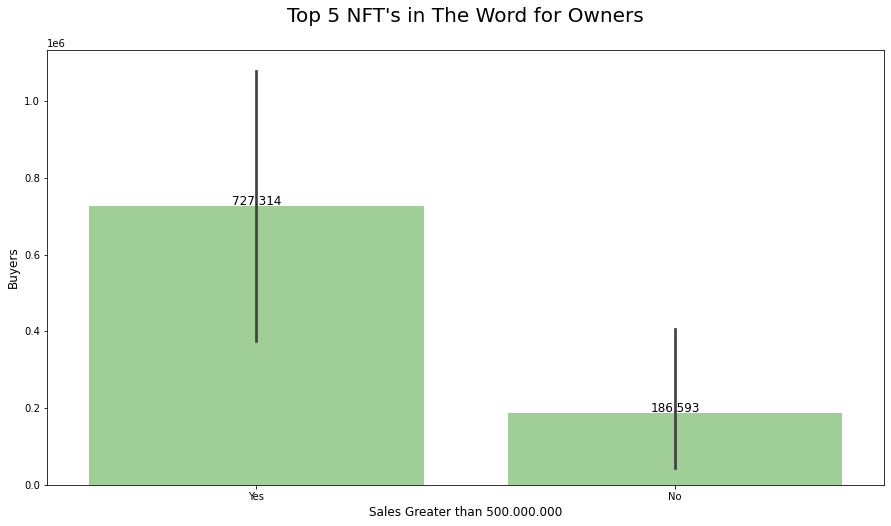

In [59]:
# In this step, I will analyzed the representation visual that  represent the buyers.  

""" Based on these data, we can analyze that most buyers are investing their money
    in companies that have already made more than 500,000,000 dollars.
"""

sales_greater_than_500000000 = sns.barplot(x="Sales Greater than 500.000.000", y="Buyers", color="#99d98c", data=nft_collections.nlargest(5, 'Buyers'))
sales_greater_than_500000000.figure.set_size_inches(15,8)

for i in sales_greater_than_500000000.patches:
    sales_greater_than_500000000.annotate('{:,.0f}'.format(i.get_height()).replace(',','.'),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
    
    
sales_greater_than_500000000.set_title("Top 5 NFT's in The Word for Owners", fontsize=20, y=1.05)
sales_greater_than_500000000.xaxis.label.set_size(12)
sales_greater_than_500000000.yaxis.label.set_size(12)




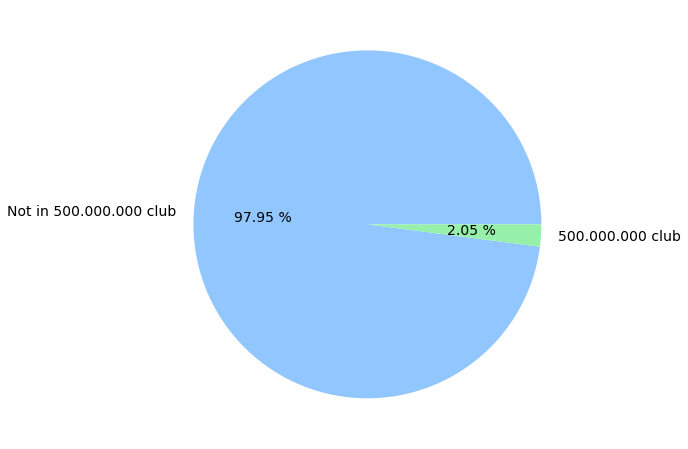

In [60]:
# At this time, I will analyze the representativeness about nft's that the value in sales in more than 500.000.000.

percent_nft_large_than_500000000 = nft_collections.groupby(['Sales Greater than 500.000.000']).count()['Collections']
labels = ["Not in 500.000.000 club","500.000.000 club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,8))
plt.pie(percent_nft_large_than_500000000,labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})
plt.show()

## In this last step, I will created the ABC analysis || Pareto Analytics

In [61]:
# For create a ABC is necessary create a percent about this sales and a percent accumulated and a rule about ABC.

""" This Rules about ABC is:
    A <= 0.8
    B <= 0.95
    C <= 1.00 """

nft_collections['percent_sales'] = nft_collections['Sales'] / nft_collections['Sales'].sum()
nft_collections['Acumulated_sales'] = nft_collections['percent_sales'].cumsum()

nft_collections['ABC'] = ['A' if i <= 0.8 else 'B' if i<0.95 else 'C' for i in nft_collections['Acumulated_sales']]

nft_collections

,Collections,Sales,Buyers,Transactions,Owners,Sales Greater than 500.000.000,percent_sales,Acumulated_sales,ABC
0,Axie Infinity,3328148500,1079811,9755511,2656431,Yes,0.228561,0.228561,A
1,CryptoPunks,1664246968,4723,18961,3289,Yes,0.114292,0.342854,A
2,Art Blocks,1075223906,20934,117602,25094,Yes,0.073841,0.416695,A
3,Bored Ape Yacht Club,783882186,8284,22584,5862,Yes,0.053833,0.470528,A
4,NBA Top Shot,781965423,374818,11790699,603928,Yes,0.053702,0.524230,A
...,...,...,...,...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061,No,0.000174,0.999309,C
246,LegionPunks,2535490,1702,3794,2410,No,0.000174,0.999483,C
247,BabyApes,2521714,1671,3405,2785,No,0.000173,0.999656,C
248,Train of the Century,2504080,3139,39460,3160,No,0.000172,0.999828,C


Text(0.5, 1.05, 'ABC Analytics || Pareto Analytics')

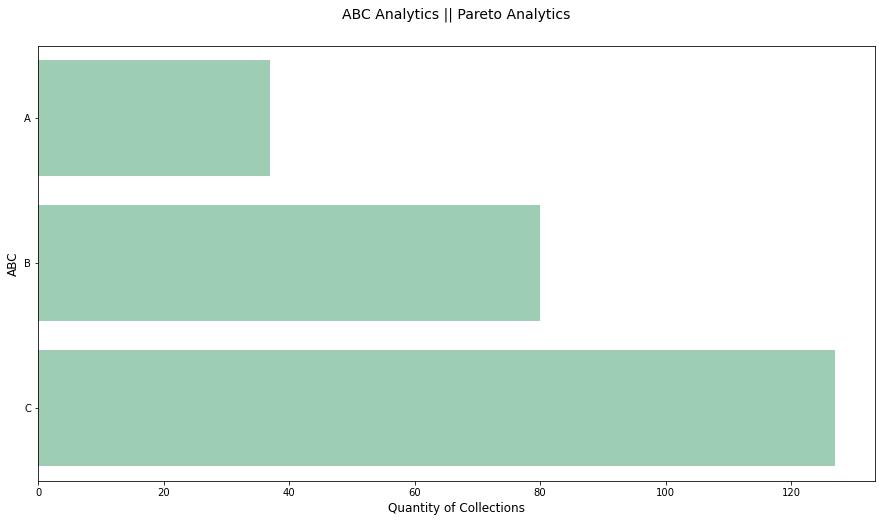

In [62]:
# Here I created a graphic for visualized a ABC.

ax = plt.subplots(figsize=(15, 8))    
    
ax = sns.countplot(y="ABC", data=nft_collections, color="#95d5b2")
ax.set_ylabel("ABC", fontsize = 12)
ax.set_xlabel("Quantity of Collections", fontsize = 12)
ax.set_title("ABC Analytics || Pareto Analytics", fontsize = 14, y=1.05)
